# Week 2 Activity: Building Sinusoids, Practicing Functions, Understanding Digital Audio
Complete this activity as part of your participation grade. Pending length of the lecture, you will have time in class to work. Everything you need to complete this activity can be found in this week's (or a previous week's) lecture code.

In [81]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
from IPython.display import Audio
from scipy.io.wavfile import read

## Sinusoids

1) Create (and then plot) a sinusoid of 44Hz, with amplitude of 2, and a sample rate of 22,050 that lasts 2 seconds.

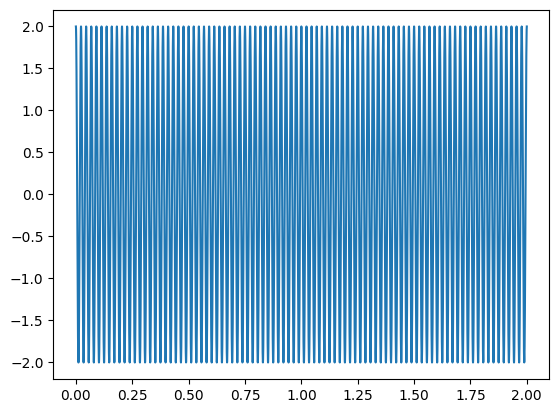

In [82]:
fs = 22050
f = 44
t = np.arange(0, 2, 1/fs)
x = 2*np.cos(2*np.pi*f*t)
plt.plot(t, x)

2) Play back your sinusoid (SET VOLUME FIRST!)

In [83]:
Audio(x/abs(np.max(x)), rate=fs)

3) Change the plot (don't just zoom in) such that you see only the first 10 cycles. Change the x-axis of your plot to show milliseconds.

Text(0, 0.5, 'Amplitude')

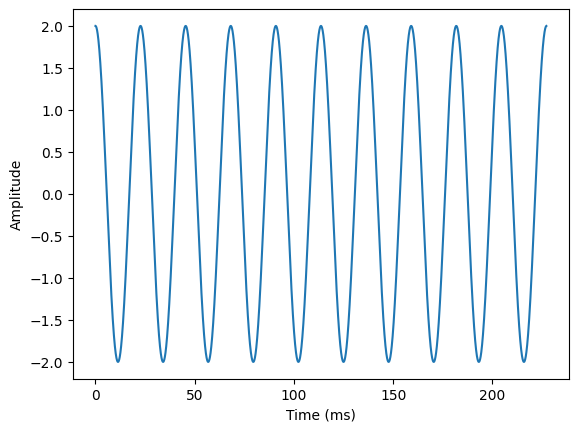

In [84]:
durSamps = int(fs*10/f)
plt.plot((t*1000)[:durSamps], x[:durSamps])
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")

4) Write a function called genSine() which returns a sinusoid given frequency, phase offset, amplitude, sampling rate, and duration in seconds(remember you can use default parameters where appropriate)

In [85]:
def genSine(f=440, phi=0, a=1, fs=44100, dur=1):
    # A class could be useful here too b/c you could
    # recall the data used to create it
    # f (Hz) phi (rad) a () fs (Hz) dur (s)
    t = np.arange(0, dur, 1/fs)
    return a*np.cos(2*np.pi*f*t + phi)

5. Plot 2 harmonic sinusoids with different amplitudes on top of each other using your function to generate the signals.

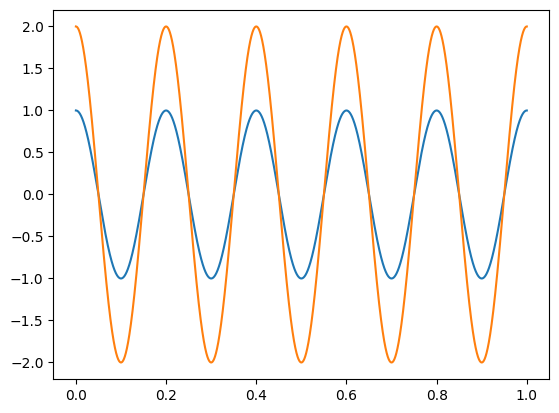

In [86]:
fs = 44100
# could make this part more elegant w/obj.
t = np.arange(0, 1, 1/fs)
sine1 = genSine(f=5)
sine2 = genSine(f=5, a=2)
plt.plot(t, sine1, t, sine2)

## Digital Audio - Sampling

1) Using your genSine function, create a sinusoid within a comfortable range in Hz of human hearing. It should cover 2s of duration and have a reasonable sampling rate. Play it back (with LOW volume!!)

In [87]:
x = genSine(f=1600, dur=2)
# It can get VERY loud and piercing
Audio(x, rate=fs)


2) What is the lowest sampling rate you can convert the sinusoid to and still hear the sound as a sinusoid at the appropriate pitch height? (Note: the `Audio` widget will not playback anything with a rate less than 3000 in Chrome and some other browsers - this can affect your mileage with this question!!)

In [88]:
# I'd assume it's 3200 b/c 1600 is Nyquist
fs = 3200
# Can barely hear it if you turn volume back up
# (and turn it back down)
# Question: why is the volume less if f is nyquist at the
# edge of aliasing?
Audio(genSine(f=1600, dur=2, fs=fs), rate=fs)

In [89]:
# Aliases to 3000 - 1600 = 1400
fs = 3000
Audio(genSine(f=1600, dur=2, fs=fs), rate=fs)

3) Create a sinusoidal signal, $s$ with a fixed sampling rate of 10kHz.  Try to play back your sinusoid under differing conditions:

* change the frequency in Hz
* change the playback speed by altering the "rate" parameter in Audio

In doing this, try to examine for yourself the relation between the Nyquist frequency and aliasing. Make plots if it helps.

In [90]:
fs = 10000
s = genSine(fs=fs)
Audio(s, rate=fs)

In [91]:
s = genSine(f=9000, fs=fs)
# aliases to |9000 - 10000| = 1000
Audio(s, rate=fs)

In [92]:
# Should sound same as above
Audio(genSine(f=1000, fs=fs), rate=fs)

In [93]:
# an octave down from 1000 -> 500
# The aliasing still occurs
# What changed is that I played it at half speed.
Audio(s, rate=fs/2)

4) Create two scenarios where you obtain an aliased frequency of approximately 200Hz (that you can (hypothetically) hear).

In [94]:
fs = 10000
Audio(genSine(f=9800, fs=fs), rate=fs)

In [95]:
# Should sound the same. both are 200 away from 10k,
# which is closest multiple of fs
Audio(genSine(f=10200, fs=fs), rate=fs)

5) Write a function to calculate aliased frequencies. Note: if sample rate is an even number, subtract 1 from sample rate first.

In [96]:
# Not sure why I'd subtract 1
def alias(f, fs=44100):
    return abs(f - fs*round(f/fs))
print(alias(10200, 10000))
print(alias(9800, 10000))

200
200


## Digital Audio - Bit depth

1) Find the file "sax-phrase-short.wav" in the "audio" folder. What is the data type of the numeric values?

In [97]:
fs, sax = read("../audio/sax-phrase-short.wav")
print(f"data type of values in sax wave file is {type(sax[0])}")
print(fs, sax)

data type of values in sax wave file is <class 'numpy.int16'>
44100 [ -7  -7  -2 ... -15 -12 -14]


2) Create a subset of the original signal from the 3000th to 4000th samples only. Plot it.

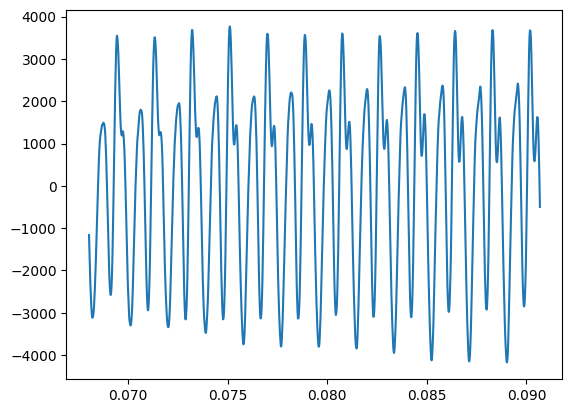

In [98]:
sax_time = np.arange(0, sax.size/fs, 1/fs)
plt.plot(sax_time[3000:4000], sax[3000:4000])

3) What is the bit depth of this audio clip?

*Hint: recall the data type*

16 bit b/c that's the number of bits in the data type used.

4) How could you convert the bit resolution to 8-bit?

*Hint: look at the range of values for numpy data types in the table from Lesson 5*

Since there is a built-in data type np.int8 that exists,
you can just cast the data in x to that and the rounding
will happen automatically.

For the general solution, I did a lot of research on it and I'll
probably ask you later. Most it was covered in the lesson
by doing
step = 1 / (2**bit_depth - 1) # assumes -1 to 1 range
x_q = round(x/step)*step
But then, I believe you have to do this:
x_q[x_q > step] = step
b/c it truncates the values down from 1 to the last step.
It's an assymetric range. The values of 4 bits are
-1 -0.5 0 0.5 b/c of effect of the two's compliment binary
technique for implementing negative numbers.

5) Write a function to scale the audio to 8-bit Test it out and play it back.

In [99]:
sax_crushed = np.int8(sax)
print(sax_crushed)
Audio(sax_crushed, rate=fs)

[ -7  -7  -2 ... -15 -12 -14]
